## Numerical Transformation


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

`Numerical transformation` is when we take our numerical data and change it into another numerical value. This is meant to change the scale of our values or even adjust the skewness of our data.

You may be thinking, “we already have our data in numbers. Why would we want to change those?” Well, first of all, that is a great question. We’ll dive deep into the “why we do this” throughout this lesson. To put it simply, we do this to help our model better compare features and, most importantly, improve our model’s accuracy and interpretability. That sounds like some good reasons to put the time and effort into numerical transformations if I do say so myself.

We’ll focus on the following numerical transformations:

- Centering
- Standard Scaler
- Min and Max Scaler
- Binning
- Log transformations


### Explore the data


In [2]:
coffee = pd.read_csv("starbucks_customers.csv")

In [3]:
coffee.head()

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout
0,13,8,52,4,4,4,4,4,4,4
1,25,8,35,4,5,5,4,4,3,3
2,10,8,29,2,1,5,2,2,2,2
3,7,8,28,4,1,4,5,3,3,4
4,10,8,28,4,2,4,4,3,4,3


In [4]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   spent              122 non-null    int64
 1   nearest_starbucks  122 non-null    int64
 2   age                122 non-null    int64
 3   rate_quality       122 non-null    int64
 4   rate_price         122 non-null    int64
 5   rate_promo         122 non-null    int64
 6   ambiance           122 non-null    int64
 7   wifi               122 non-null    int64
 8   service            122 non-null    int64
 9   meetings_hangout   122 non-null    int64
dtypes: int64(10)
memory usage: 9.7 KB


In [45]:
coffee.dtypes

spent                   int64
nearest_starbucks       int64
age                     int64
rate_quality            int64
rate_price              int64
rate_promo              int64
ambiance                int64
wifi                    int64
service                 int64
meetings_hangout        int64
binned_ages          category
dtype: object

### Centering the data

Data centering involves subtracting the mean of a data set from each data point so that the new mean is 0. This process helps us understand how far above or below each of our data points is from the mean.


In [9]:
ages = coffee["age"]
ages

0      52
1      35
2      29
3      28
4      28
       ..
117    22
118    22
119    20
120    20
121    14
Name: age, Length: 122, dtype: int64

In [17]:
mean_age = np.mean(ages)
mean_age

27.33606557377049

In [18]:
centered_ages = ages - mean_age
centered_ages

0      24.663934
1       7.663934
2       1.663934
3       0.663934
4       0.663934
         ...    
117    -5.336066
118    -5.336066
119    -7.336066
120    -7.336066
121   -13.336066
Name: age, Length: 122, dtype: float64

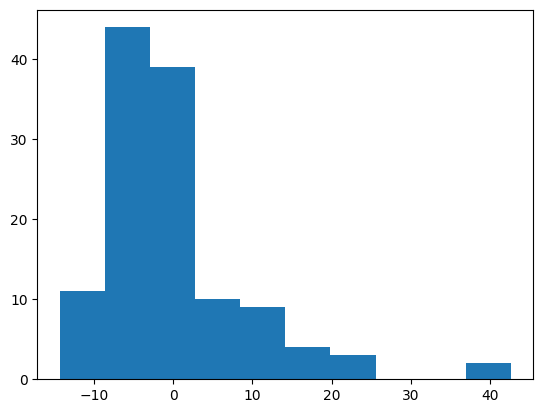

In [13]:
plt.hist(centered_ages)
plt.show()

### Standardize data

Standardization (also known as Z-Score normalization) is when we center our data, then divide it by the standard deviation. Once we do that, our entire data set will have a mean of zero and a standard deviation of one. This allows all of our features to be on the same scale.

This step is critical because some machine learning models will treat all features equally regardless of their scale. You’ll definitely want to standardize your data in the following situations:

- Before Principal Component Analysis
- Before using any clustering or distance based algorithm (think KMeans or DBSCAN)
- Before KNN
- Before performing regularization methods like LASSO and Ridge

z = (value - mean) / stdev


In [15]:
std_dev_age = np.std(ages)
std_dev_age

9.428428111378789

In [19]:
ages_standardized = (ages - mean_age) / std_dev_age
ages_standardized

0      2.615912
1      0.812854
2      0.176481
3      0.070418
4      0.070418
         ...   
117   -0.565955
118   -0.565955
119   -0.778079
120   -0.778079
121   -1.414453
Name: age, Length: 122, dtype: float64

Standardized datasets have a mean of 0 and a standard deviation of 1.


In [20]:
print(np.mean(ages_standardized), np.std(ages_standardized))

1.7290358580227847e-16 0.9999999999999999


### Standardizing data with sklearn

Now that we understand the mathematics behind a standard scaler let’s quickly implement it with the sklearn library. We will begin by importing our `StandardScaler` library from `sklearn.preprocessing`.


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
ages_reshaped = np.array(ages).reshape(-1, 1)
ages_reshaped

array([[52],
       [35],
       [29],
       [28],
       [28],
       [28],
       [27],
       [26],
       [26],
       [26],
       [51],
       [26],
       [22],
       [21],
       [17],
       [15],
       [13],
       [65],
       [42],
       [35],
       [29],
       [29],
       [27],
       [23],
       [21],
       [70],
       [41],
       [40],
       [37],
       [34],
       [25],
       [23],
       [20],
       [20],
       [20],
       [14],
       [28],
       [38],
       [32],
       [29],
       [23],
       [23],
       [23],
       [21],
       [20],
       [19],
       [15],
       [15],
       [23],
       [22],
       [16],
       [26],
       [20],
       [52],
       [32],
       [29],
       [24],
       [23],
       [24],
       [22],
       [21],
       [16],
       [23],
       [22],
       [30],
       [44],
       [38],
       [31],
       [30],
       [29],
       [28],
       [25],
       [25],
       [24],
       [22],
       [21],
       [20],

In [25]:
ages_scaled = scaler.fit_transform(ages_reshaped)
ages_scaled

array([[ 2.6159116 ],
       [ 0.81285389],
       [ 0.17648058],
       [ 0.07041836],
       [ 0.07041836],
       [ 0.07041836],
       [-0.03564386],
       [-0.14170608],
       [-0.14170608],
       [-0.14170608],
       [ 2.50984938],
       [-0.14170608],
       [-0.56595495],
       [-0.67201717],
       [-1.09626604],
       [-1.30839048],
       [-1.52051492],
       [ 3.99472043],
       [ 1.55528941],
       [ 0.81285389],
       [ 0.17648058],
       [ 0.17648058],
       [-0.03564386],
       [-0.45989273],
       [-0.67201717],
       [ 4.52503152],
       [ 1.4492272 ],
       [ 1.34316498],
       [ 1.02497832],
       [ 0.70679167],
       [-0.2477683 ],
       [-0.45989273],
       [-0.77807939],
       [-0.77807939],
       [-0.77807939],
       [-1.4144527 ],
       [ 0.07041836],
       [ 1.13104054],
       [ 0.49466723],
       [ 0.17648058],
       [-0.45989273],
       [-0.45989273],
       [-0.45989273],
       [-0.67201717],
       [-0.77807939],
       [-0

Confirm mean equals to 0, and standard deviation to 1.


In [26]:
print(np.mean(ages_scaled), np.std(ages_scaled))

1.7290358580227847e-16 0.9999999999999999


### Min-Max normalization

Another form of scaling your data is to use a min-max normalization process. The name says it all, we find the minimum and maximum data point in our entire data set and set each of those to 0 and 1, respectively. Then the rest of the data points will transform to a number between 0 and 1, depending on its distance between the minimum and maximum number. We find that transformed number by taking the data point subtracting it from the minimum point, then dividing by the value of our maximum minus minimum.

One thing to note about min-max normalization is that **this transformation does not work well with data that has extreme outliers.**

You will want to perform a min-max normalization if the range between your min and max point is not too drastic.

The reason we would want to normalize our data is very similar to why we would want to standardize our data - getting everything on the same scale.

We’d do this process to our entire data set, but lets look at our distance to a nearest Starbucks feature. We already know from earlier in this lesson that our range in this feature is not too large, so it is a good candidate for a min-max normalization. We’ll write a function that will perform the mathematics needed to transform the entire column.


In [27]:
ages_normalized = (ages - min(ages)) / (max(ages) - min(ages))
ages_normalized

0      0.684211
1      0.385965
2      0.280702
3      0.263158
4      0.263158
         ...   
117    0.157895
118    0.157895
119    0.122807
120    0.122807
121    0.017544
Name: age, Length: 122, dtype: float64

In [30]:
print(max(ages_normalized), min(ages_normalized))

1.0 0.0


### Min-Max Normalization with sklearn


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mmscaler = MinMaxScaler()

In [43]:
ages_reshaped = np.array(ages).reshape(-1, 1)

In [44]:
reshaped_scaled = mmscaler.fit_transform(ages_reshaped)
print(np.min(reshaped_scaled), np.max(reshaped_scaled))

0.0 0.9999999999999998


### Binning our data

Binning data is the process of taking numerical or categorical data and breaking it up into groups. We could decide to bin our data to help capture patterns in noisy data. There isn’t a clean and fast rule about how to bin your data, but like so many things in machine learning, you need to be aware of the trade-offs.

You want to make sure that your bin ranges aren’t so small that your model is still seeing it as noisy data. Then you also want to make sure that the bin ranges are not so large that your model is unable to pick up on any pattern.

It is a delicate decision to make and will depend on the data you are working with.


In [36]:
age_bins = [12, 20, 30, 40, 71]

In [39]:
coffee["binned_ages"] = pd.cut(coffee["age"], age_bins, right=False)
coffee["binned_ages"]

0      [40, 71)
1      [30, 40)
2      [20, 30)
3      [20, 30)
4      [20, 30)
         ...   
117    [20, 30)
118    [20, 30)
119    [20, 30)
120    [20, 30)
121    [12, 20)
Name: binned_ages, Length: 122, dtype: category
Categories (4, interval[int64, left]): [[12, 20) < [20, 30) < [30, 40) < [40, 71)]

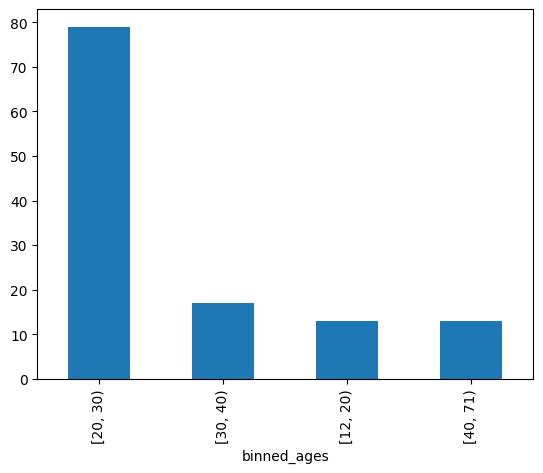

In [40]:
coffee["binned_ages"].value_counts().plot(kind="bar")
plt.show()

### Natural log transformation

We’ve covered plenty of transformations! We have one last transformation we need to cover, and that is log transformations. Logarithms are an essential tool in statistical analysis and machine learning preparation.

**This transformation works well for right-skewed data and data with large outliers.** After we log transform our data, one large benefit is that it will allow the data to be closer to a “normal” distribution. It also changes the scale so our data points will drastically reduce the range of their values.

Before we have you start testing your new skills let’s quickly cover two major topics with log transformation:

1. Using a log transformation in a machine learning model will require some extra interpretation. For example, if you were to log transform your data in a linear regression model, our independent variable has a multiplication relationship with our dependent variable instead of the usual additive relationship we would have if our data was not log-transformed.

2. Keep in mind, just because your data is skewed does not mean that a log transformation is the best answer. You would not want to log transform your feature if:

- You have values less than 0. The natural logarithm (which is what we’ve been talking about) of a negative number is undefined.
- You have left-skewed data. That data may call for a square or cube transformation.
- You have non-parametric data
